Linear Regression Results:
Slope (coefficient): 0.0527
Intercept: -1.2349
R-squared: 0.2403
Equation: DCH Price = 0.0527 × DAM Price + -1.2349


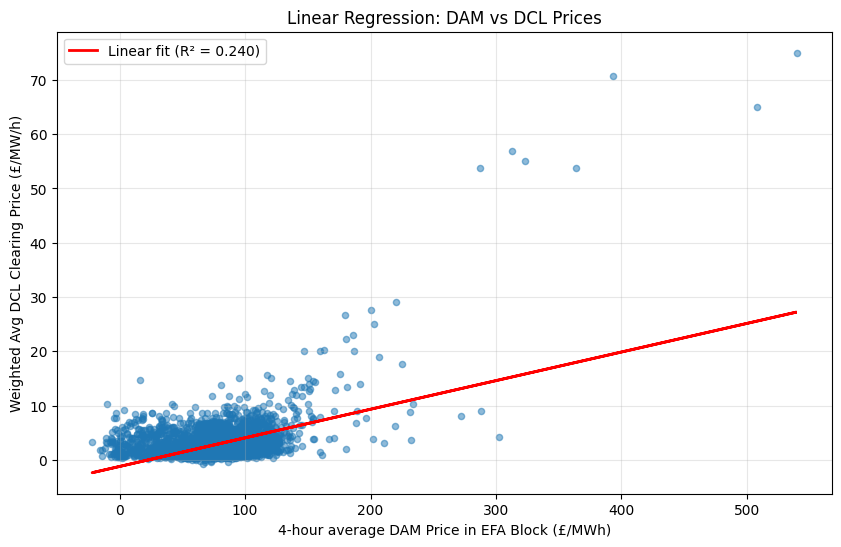


Data summary:
Number of observations: 3635
DAM price range: £-21.82 - £539.60/MWh
DCL price range: £-0.71 - £75.00/MWh


In [2]:
# Simple linear regression between DAM and DCH prices
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load merged data
data = pd.read_csv('DAM_DCL_Merged_Prices.csv')

# Prepare data for regression
X = data['Average DAM price in EFA block'].values.reshape(-1, 1)  # Independent variable
y = data['Weighted_Avg_Clearing_Price'].values  # Dependent variable

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Print results
print(f"Linear Regression Results:")
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Equation: DCH Price = {model.coef_[0]:.4f} × DAM Price + {model.intercept_:.4f}")

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, s=20)
plt.plot(X, y_pred, 'r-', linewidth=2, label=f'Linear fit (R² = {r2:.3f})')
plt.xlabel('4-hour average DAM Price in EFA Block (£/MWh)')
plt.ylabel('Weighted Avg DCL Clearing Price (£/MW/h)')
plt.title('Linear Regression: DAM vs DCL Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nData summary:")
print(f"Number of observations: {len(data)}")
print(f"DAM price range: £{X.min():.2f} - £{X.max():.2f}/MWh")
print(f"DCL price range: £{y.min():.2f} - £{y.max():.2f}/MWh")